# Introducción a la Inteligencia Artificial

## CLASE 2

## Referencias

- [Cheatsheet de Latex](https://www.caam.rice.edu/~heinken/latex/symbols.pdf)
- [DRIVE](https://drive.google.com/drive/folders/1TDRvlwfSgLI39gHXgVhWlSaRJ-aTSaDE?usp=sharing)

## Comentarios sobre el estado del documento



## Importar librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

# MATPLOTLIB & SNS
# from mpl_toolkits import mplot3d
# from matplotlib import cm
# from matplotlib_venn import venn2
# import seaborn as sns

# MATH & RANDOM
# import math
# import numpy.random as random
# import scipy.stats as stats
# random.seed(42)

#PANDAS
# import pandas as pd

# %matplotlib inline

In [76]:
# Ejercicio 3 
"""
Implementacion basica de K-means en Numpy
K-means es uno de los algoritmos más básicos en Machine Learning no supervisado.
Es un algoritmo de clusterización, que agrupa los datos que comparten características similares.
Recordemos que entendemos datos como n realizaciones del vector aleatorio X.
El algoritmo K-means funcione de la siguiente manera:
1. El usuario selecciona la cantidad de clusters a crear (n).
2. Se seleccionan n elementos aleatorios de X como posiciones iniciales del los centroides C.
3. Se calcula la distancia entre todos los puntos en X y todos los puntos en C.
4. Para cada punto en X se selecciona el centroide más cercano de C.
5. Se recalculan los centroides C a partir de usar las filas de X que pertenecen a cada centroide.
6. Se itera entre 3 y 5 una cantidad fija de veces o hasta que la posición de los centroides no cambie.
Implementar la función def k_means(X, n) de manera tal que al finalizar devuelva la posición de los
centroides y a que cluster pertenece cada fila de X.
Hint: para (2) utilizar funciones de np.random, para (3) y (4) usar los ejercicios anteriores,
para (5) es válido utilizar un for. Iterar 10 veces entre (3) y (5).
"""
mean = 5
std = 2
SIZE = 1000

def sinthetic_data(mean, std, SIZE, n_clusters , separation):
    sint_data = np.zeros([SIZE, n_clusters])
    classes = np.zeros([SIZE])
    for i in range(n_clusters):
            from_ = i * int(SIZE/n_clusters)
            to_ = i * int(SIZE/n_clusters) + int(SIZE/n_clusters)
            sint_data[from_:to_,i] = separation[i] * np.array([np.random.normal(mean, std)])
            classes[from_:to_] = i + 1
    sint_data += np.random.normal(0, 3, size=sint_data.shape)
    
    return sint_data, classes

simulated_data, simulated_data_classes = sinthetic_data(2, 0.5, 1000, 3, [1, 5, 10])


X = simulated_data
n_clusters = 3
MAX_ITER = 10

    
def redefine_centroids(X, centroids, n_clusters):    
    distance = np.sqrt(np.sum((centroids[:,None] - X)**2, axis=2))
    centroid_with_min_distance = np.argmin(distance, axis=0)

    for i in range(centroids.shape[0]):
        centroids[i] = np.mean( X[centroid_with_min_distance == i, :], axis = 0)
    return centroids, centroid_with_min_distance


def kmeans(X, n_clusters):
    MAX_ITER = 20
    centroids = np.eye(n_clusters, X.shape[1])*10 + np.random.random(size=[n_clusters, X.shape[1]])*2
        
    for i in range(MAX_ITER):
        centroids, clusters = redefine_centroids(X, centroids, n_clusters)
        
    return centroids, clusters

centroids_prueba, clusters_prueba = kmeans(X, n_clusters)


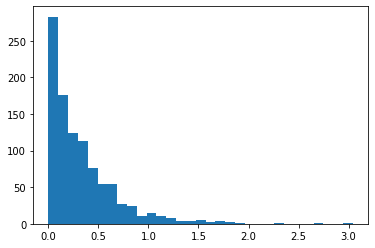

In [4]:
# Ejercicio 5

""" Ejercicio #5 | Utilizar numpy para simular una exponencial de parámetro lambda
Hint:
● Hacer una función que genere n muestras de la variable aleatoria X
● Utilizar el resultado obtenido en la diapositiva anterior
● Utilizar np.random.uniform"""

def simular_exponencial(param, n_simulaciones):
    simu_U = np.random.uniform(0,1,n_simulaciones)
    simu_exp = -np.log(1 - simu_U) / param
    return simu_exp

exp_ordenada = np.sort(simular_exponencial(3, 1000))
plt.hist(exp_ordenada, bins= int(1000**0.5))
plt.show()


In [127]:
# Ejercicio 9
""" Ejercicio #9 | Remover filas y columnas con NaNs en un dataset
Dato un dataset, hacer una funcion que utilizando numpy filtre las columnas y las filas que tienen NaNs/"""

def erase_row_col_nan(data):
    nan_matrix = np.isnan(data)
    mask_row_ful = nan_matrix.sum(axis=1) == 0
    mask_col_ful = nan_matrix.sum(axis=0) == 0
    
    non_nan_data = data[mask_row_ful, mask_col_ful]
    return non_nan_data
a = np.array([[np.nan,5],[1,5]])



array([5.])

In [6]:
# Ejercicio 10
"""Reemplazar NaNs por la media de la columna.
Dato un dataset, hacer una función que utilizando numpy reemplace los NaNs por la media de la columna."""

def replace_nans_colmean(data):
    nan_matrix = np.isnan(data)
    col_means = np.nanmean(data, axis=0)
    
    means_broadcasted = np.ones(shape = nan_matrix.shape) * col_means
    data[nan_matrix]= means_broadcasted[nan_matrix]4
    
    
    
#     for i in range(col_means.shape[0]):
#         data[:,i] = np.where(nan_matrix[:,i] == True, col_means[i], data[:,i])
    
    return data

data, i = sinthetic_data(10,1, 10, 3, [1,2,3])

for i in [0, 2, 5, 7]:
    for j in [1, 2]:
        data[i, j]= np.nan
        
print('the mean of the columns are:', np.nanmean(data, axis=0))
        
print('the filed dataset is:\n', replace_nans_colmean(data))

the mean of the columns are: [ 4.66118775  5.22512698 10.10883916]
the filed dataset is:
 [[13.23904638  5.22512698 10.10883916]
 [11.60242808 -1.75552491  0.73642307]
 [14.84056088  5.22512698 10.10883916]
 [-0.88103032 16.17893146 -3.91206011]
 [-1.84065336 20.14913581  1.27721917]
 [ 4.53664021  5.22512698 10.10883916]
 [-2.67362342 -2.9301867  24.26878997]
 [-3.85735695  5.22512698 10.10883916]
 [ 5.54390767 -3.57819098 34.90779758]
 [ 6.10195834  3.28659719  3.37486527]]


In [9]:
# Ejercicio 11

'''Dado un dataset X separarlo en 70 / 20 / 10
Como veremos en las próximas clases, en problemas de Machine Learning es fundamental que separemos
los datasets de n muestras, en 3 datasets de la siguiente manera:
● Training dataset: los datos que utilizaremos para entrenar nuestros modelos. 70% de las muestras.
● Validation dataset: los datos que para calcular métricas y ajustar los parámetros de nuestros modelos.
20% de las muestras.

● Testing dataset: una vez que entrenamos los modelos y encontramos los parametros optimos de los
mismos, el testing dataset se lo utiliza para computar las métricas finales de nuestros modelos y
analizar cómo se comporta con respecto a la generalización.
A partir de utilizar np.random.permutation hacer un método que dado un dataset, devuelva los 3 datasets
como nuevos numpy arrays.'''

def train_test_split(data, test_size = 0.1, validation_size = 0.2):
    # divides the dataset by permutating, masking and slicing into train and split
    SIZE = data.shape[0]
    data_total = data
    idx = np.arange(0, SIZE)
    
    train_interval = int((1 - test_size - validation_size) * SIZE)
    validation_interval = int((1 - test_size) * SIZE)

    # permutate
    perm_idx = np.random.permutation(idx)

    # generate index slice
    train_idx = perm_idx[:train_interval]
    validation_idx = perm_idx[train_interval: validation_interval]
    test_idx = perm_idx[validation_interval:]

    # slice dataset
    train_data = data_total[train_idx]
    validation_data = data_total[validation_idx]
    test_data = data_total[test_idx]

    return train_data, validation_data, test_data


In [12]:
# Ejercicio # 12 - Integrador Clase #1 y Clase #2
'''
Aplicar todo lo visto en clase a un ejercicio de clusterización básico.
-1. Generar un dataset sintético que clusterice data en 4 clusters utilizando números random.
-a. Utilizar 4 dimensiones.
-b. Generar un dataset con 100K de muestras.
-2. Cambiar algunos puntos de manera aleatoria y agregar NaN (0.1% del dataset).
-3. Guardar el dataset en un .pkl
-4. Cargar el dataset con Numpy desde el .pkl
-5. Completar NaN con la media de cada feature.
-6. Calcular la norma l2, la media y el desvío de cada feature con funciones numpy vectorizadas.
7. Agregar una columna a partir de generar una variable aleatoria exponencial a todos los puntos.
8. Hacer el histograma de la distribución exponencial.
9. Aplicar PCA al dataset reduciendo a 2 dimensiones y graficar el cluster.
10. Hacer la clusterización con el k-means desarrollado en clase.
11. Volver a graficar el cluster con lo obtenido en (10) y comparar resultados con (9).
12. Analizar que pasa si los clusters comienzan a tener overlapping.'''


class Data(object):
    instance = None
    
    def __new__(cls, PICKLE_PATH):
        if Data.instance is None:
            print('__new__ object created')
            Data.instance = super(Data, cls).__new__(cls)
            return Data.instance
        else: 
            return Data.instance
                                                                
    
    def __init__(self, PICKLE_PATH):
        self.PICKLE_PATH = PICKLE_PATH
    
    
    def sinthetic_data(self, mean, std, SIZE, n_clusters , separation):
        sint_data = np.zeros([SIZE, n_clusters])
        classes = np.zeros([SIZE])
        for i in range(n_clusters):
                from_ = i * int(SIZE/n_clusters)
                to_ = i * int(SIZE/n_clusters) + int(SIZE/n_clusters)
                sint_data[from_:to_,i] = separation[i] * np.array([np.random.normal(mean, std)])
                classes[from_:to_] = i + 1
        sint_data += np.random.normal(0, 3, size=sint_data.shape)

        self.data = sint_data
        self.data_classes = data_classes
    
        return sint_data, classes

    
    
    
    def create_data_w_random_nans(self, mean, std, SIZE, n_clusters , separation, size_nans=0.01):
        
        data, data_classes = sinthetic_data(mean, std, SIZE, n_clusters, separation)

        data_flat = np.ndarray.flatten(data)
        nan_idx = np.random.permutation(range(data_flat.shape[0]))[:int(size_nans * data_flat.shape[0]) ]
        data_flat[nan_idx] = np.nan
        data_w_nans = data_flat.reshape([data.shape[0], data.shape[1]])
    
        self.data = data_w_nans
        self.data_classes = data_classes
        
        return data_w_nans, data_classes
    
    
    def check_pickle(self):
    
        if not os.path.exists(self.PICKLE_PATH):
            print('there is no pickle file')
            return False
        elif os.path.getsize(self.PICKLE_PATH) > 0:
            return True
        else:
            print('the pickle file exists but is empty')
            return False
        
        
    def load_pickle(self):
        if self.check_pickle() == True:
            with open(self.PICKLE_PATH, 'rb') as f:
                            array = pickle.load(f)
                            print('full array is', array)
            self.data, self.data_classes = array[0], array[1]
            return array
            
        else:
            return print('sorry')
    
    
    def save_pickle(self):
        
        """ saves the pickle data """
        
        full_array = self.data
        categories = self.data_classes
        # Read CSV
        
        with open(self.PICKLE_PATH, 'wb') as f:
            pickle.dump((full_array, categories), f)

        return full_array
        
        
    def complete_nan_w_colmean(self):
        
        nan_mask = np.isnan(self.data)
        mean_mask = np.nanmean(self.data, axis=0) * nan_mask
        self.data[nan_mask] = mean_mask[nan_mask]
    
        return self.data
    
    def calc_metrics(self):
        l2_norm = np.sum(np.fillna(self.data, 0)**2, axis=0)**0.5
        mean = np.nanmean(np.fillna(self.data, 0), axis=0)
        std = np.sum((np.fillna(self.data, 0) - mean)**2, axis=0)**0.5
        
        print('the norm is:', l2_norm)
        print('the mean is:', mean)
        print('the std dev is:', std)
        
        return l2_norm, mean, std
    
    def add_exp_column(self, lamb):
        exp_column = -np.log(1 - np.random.random(size= [self.data.shape[0], 1]))/lamb
        self.data = np.hstack((self.data, exp_column))
        return self.data


array([[ 3.34987922e+00, -8.39396014e-01,  6.54828715e+00,
         2.84038298e+00,  1.20547875e-01],
       [-1.36443490e+00, -1.96319735e+00,  3.01583359e+00,
        -9.16212740e-01,  2.51417752e-01],
       [-2.23681246e+00,  3.27570591e+00, -6.29507154e+00,
         2.49160605e+00,  1.29960785e-01],
       ...,
       [ 1.60735299e-01,  5.80209055e+00, -1.23046873e+00,
         5.38349659e+01,  5.22943638e-02],
       [-1.21450196e+00,  1.07105613e+00,  5.68396205e-01,
         5.45070191e+01,  4.27742404e-02],
       [-2.06280497e+00, -2.95793163e+00, -1.09069547e+00,
         5.61101229e+01,  1.27712858e-01]])

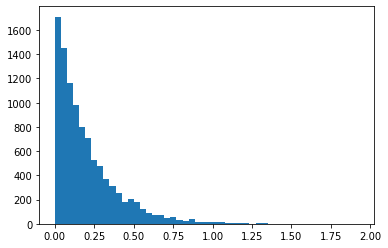

In [17]:
m = Data('C:\\Users\\jota_\\00_Especialización_IA\\EspecializacionIA\\00_Datasets\\04_Temporal\\test_set.pkl')

m.create_data_w_random_nans(1, 0.01, 10000, 4 , [1,10,100,50], size_nans=0.01)

m.add_exp_column(5)

plt.hist(m.data[:,4], bins = 50)

m.complete_nan_w_colmean()

In [18]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    
    return X_norm
x = np.array([[0.4, 4800, 5.5], [0.7,12104, 5.2],[1,12500,5.5], [1.5,7002, 4.0]])
def pca(X, d):
    # paso numero 1, centrar todas las variables
    X_centered = X - np.mean(X, axis=0)
    
    # Transponer la matriz y calcular la covarianza
    cov_x_t = np.cov(np.transpose(X))
    
    # calcular los autovalores y autovectores
    W, V = np.linalg.eig(cov_x_t)
    
    #
    W_index = np.argsort(W)[::-1]
    V_sorted = V[W_index]
    
    PCA = np.matmul(X_centered, V_sorted[:,:d] )
    return PCA
    
pca(x, 2)

array([[ 2.27524962e-01,  2.35542452e+03],
       [ 3.05282357e-01, -1.64365590e+03],
       [ 6.25767293e-01, -1.86071093e+03],
       [-1.15857461e+00,  1.14894232e+03]])

[[ 75.79190111   3.48325462]
 [-32.14681155  32.07507713]
 [  2.53104374 -12.60927127]
 [-21.87476626 -17.61990796]]


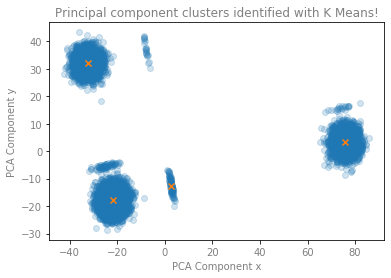

In [113]:
PCA_matrix = pca(m.data, 2)



K_Centers, k_classes = kmeans(PCA_matrix, 4)
print(K_Centers)


plt.scatter(PCA_matrix[:,0], PCA_matrix[:,1], alpha = 0.2)
plt.scatter(K_Centers[:,0], K_Centers[:,1], marker= 'x')

plt.title('Principal component clusters identified with K Means!', c='grey')

plt.xlabel('PCA Component x', c='grey')
plt.ylabel('PCA Component y', c='grey')

plt.xticks(c='grey')
plt.yticks(c='grey')

plt.show()